# 01 Importing Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/Dena/Instacart Basket Analysis'

In [4]:
# import the new merged data (orders, products, and customers)
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [5]:
df.shape

(32404859, 34)

In [6]:
# check the output
df.head()

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,Yes,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,No,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 02 Visualizations

#### Question 2

If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [7]:
# import merged order and product data
df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_grouped_2.pkl'))

# check the output
df_ords_prods.head()

,order_id,user_id,number_of_orders_by_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_orders,spending_flag,median_of_days_since_prior_order,regularity_flag
0,2539329,1,1,2,8,NaN,Yes,196,1,0,...,Regularly busy,Mid-range product,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,No,196,1,1,...,Regularly busy,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,No,196,1,1,...,Regularly busy,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,No,196,1,1,...,Least busy,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,No,196,1,1,...,Least busy,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<AxesSubplot:>

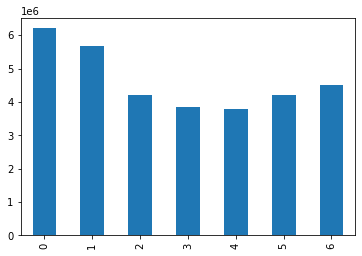

In [8]:
# bar chart with original sorting
df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# turn prices > 100 into missing values
df_ords_prods.loc[df_ords_prods['prices'] >100, 'prices'] = np.nan

# check the max price
df_ords_prods['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

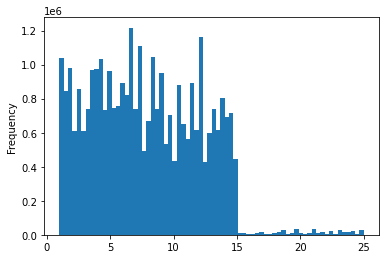

In [10]:
# make a histogram of the prices
df_ords_prods['prices'].plot.hist(bins = 70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

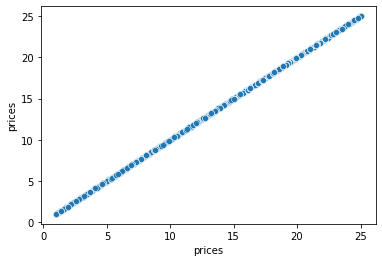

In [11]:
# make a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods)

In [12]:
# create a list of random floating numbers between 0 and 1 in order to create a sample
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [13]:
# split the dataframe into 2 samples (70% big and 30% small)
big = df_ords_prods[dev]
small = df_ords_prods[~dev]

In [14]:
# check to make sure the sizes of big and small add to the size of the data frame
len(df_ords_prods)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
# speed up the process by creating a mini data frame with only what is necessary
df_mini = small[['orders_day_of_week','prices']]

In [17]:
# check the output 
df_mini.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


Text(0.5, 1.0, 'Average Price of Items Sold by Day of Week')

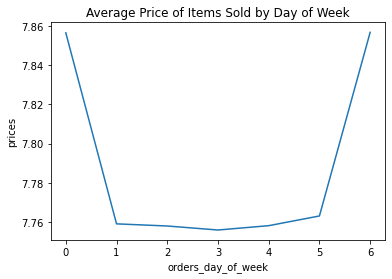

In [52]:
# create the line chart
line = sns.lineplot(data = df_mini, x = 'orders_day_of_week', y = 'prices')
plt.title('Average Price of Items Sold by Day of Week')

#### Question 3

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [19]:
# before beginning, turn prices > 100 into missing values for the fully merged data frame
df.loc[df['prices'] >100, 'prices'] = np.nan

# check the max price
df['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

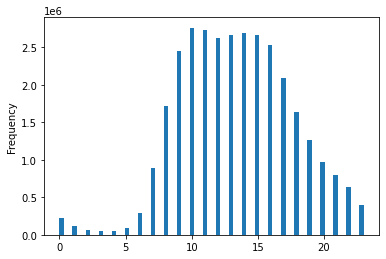

In [20]:
# make a histogram for order_hour_of_day
df['order_hour_of_day'].plot.hist(bins = 70)

This histogram demonstrates that most orders are placed from 9am to 5pm. The amount of ordering gradually decreases throughout the evening/night, then starts to increase again after 5am.

#### Question 4

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<AxesSubplot:>

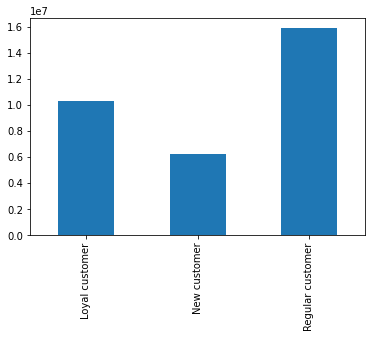

In [21]:
df['loyalty_flag'].value_counts().sort_index().plot.bar()

#### Question 5

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [22]:
# create a list of random floating numbers between 0 and 1 in order to create a sample
np.random.seed(4)
dev2 = np.random.rand(len(df)) <= 0.7

In [23]:
# split the dataframe into 2 samples (70% big and 30% small)
big2 = df[dev2]
small2 = df[~dev2]

In [24]:
# check to make sure the sizes of big and small add to the size of the data frame
len(df)

32404859

In [25]:
len(big2) + len(small2)

32404859

In [26]:
# speed up the process by creating a mini data frame with only what is necessary
df_mini2 = small2[['order_hour_of_day','prices']]

# check the output 
df_mini2.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


Text(0.5, 1.0, 'Average Price of Items Sold by Hour of Day')

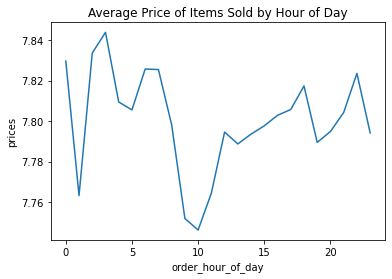

In [49]:
# create the line chart
line2 = sns.lineplot(data = df_mini2, x = 'order_hour_of_day', y = 'prices')
plt.title('Average Price of Items Sold by Hour of Day')

#### Question 6

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [28]:
# create a list of random floating numbers between 0 and 1 in order to create a sample
np.random.seed(4)
dev3 = np.random.rand(len(df)) <= 0.7

In [29]:
# split the dataframe into 2 samples (70% big and 30% small)
big3 = df[dev3]
small3 = df[~dev3]

In [30]:
# speed up the process by creating a mini data frame with only what is necessary
df_mini3 = small3[['age','number_of_dependents']]

# check the output 
df_mini3.head()

,age,number_of_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


Text(0.5, 1.0, 'Age vs Number of Dependents')

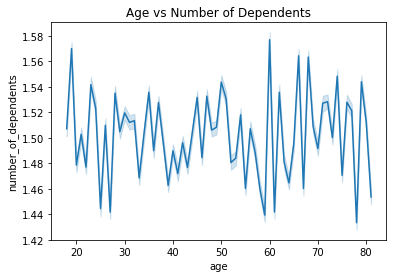

In [54]:
# create the line chart
line3 = sns.lineplot(data = df_mini3, x = 'age', y = 'number_of_dependents')
plt.title('Age vs Number of Dependents')

This line chart shows that there isn't a correlation between age and number of dependents.

#### Question 7

You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0.5, 1.0, 'Age vs Income')

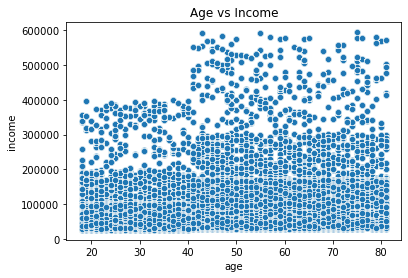

In [32]:
# make a scatterplot
sns.scatterplot(x = 'age', y = 'income',data = df)
plt.title('Age vs Income')

The scatterplot shows that from the age of 40 and up, there are individuals with a much higher spending power than those under 40.

# 03 Exports

In [33]:
# export the data frame
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_2.pkl'))

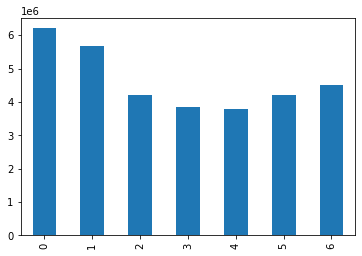

In [34]:
# save the first bar chart to Jupyter's memory
bar = df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [35]:
# export the bar chart to the computer
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

(I already exported the first histogram to my computer in the lesson, so am skipping that here.)

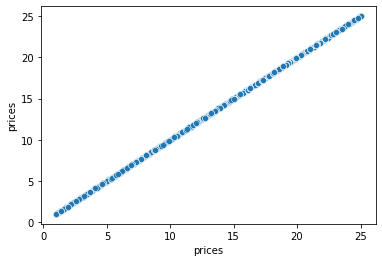

In [36]:
# save the first scatterplot to Jupyter's memory
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods)

In [37]:
# export the scatter plot to the computer
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [53]:
# export the first line chart to the computer
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_dow_prices.png'),bbox_inches = 'tight')

Text(0.5, 1.0, 'Frequency of Items Sold by Hour of Day')

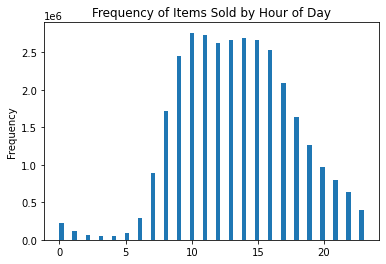

In [56]:
# save the second histogram to Jupyter's memory
hist2 = df['order_hour_of_day'].plot.hist(bins = 70)
plt.title('Frequency of Items Sold by Hour of Day')

In [57]:
# export the second histogram to the computer
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'),bbox_inches = 'tight')

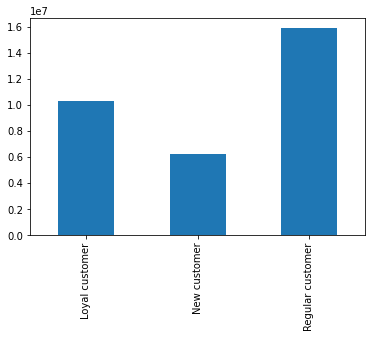

In [41]:
# save the second bar chart to Jupyter's memory
bar2 = df['loyalty_flag'].value_counts().sort_index().plot.bar()

In [42]:
# export the second bar chart to the computer
# bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [50]:
# export the second line chart to the computer
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hod_prices.png'),bbox_inches = 'tight')

In [55]:
# export the third line chart to the computer
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_vs_dependents.png'),bbox_inches = 'tight')

Text(0.5, 1.0, 'Age vs Income')

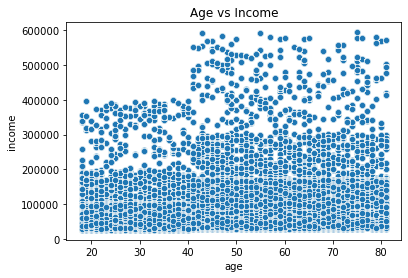

In [47]:
# save the second scatterplot to Jupyter's memory
scatter2 = sns.scatterplot(x = 'age', y = 'income',data = df)
plt.title('Age vs Income')

In [48]:
# export the second scatterplot to the computer
scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_vs_income.png'),bbox_inches='tight')